In [253]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

In [734]:
df = pd.read_csv('cleaned_data.csv', sep=';')

In [735]:
# Create dummy variables for the 'Category' column
dummy_1 = pd.get_dummies(df['property_type'], prefix='type')
dummy_2 = pd.get_dummies(df['heating_source'], prefix = '')

# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df, dummy_1,dummy_2], axis=1)

In [736]:
df_clean = df_with_dummies.drop(columns=['Maskinhus, garage mv.','Energimærke_nan', 'property_type',
                                         'heating_source'])
df_clean = df_clean.dropna().reset_index(drop=True)

In [737]:
df_clean['Ejerudgift'] = df_clean['Ejerudgift'].astype(str)
df_clean['Ejerudgift'] = df_clean['Ejerudgift'].str.replace(".", "")
df_clean['Ejerudgift'] = df_clean['Ejerudgift'].astype(float)
df_clean

C:\Users\marko\AppData\Local\Temp/ipykernel_21376/557726641.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['Ejerudgift'] = df_clean['Ejerudgift'].str.replace(".", "")


,Rum,Toilet,Boligareal,Grundareal,Kontantpris,Ejerudgift,Plan,city_distance,Age,Energimærke_B,...,close_city_Copenhagen,close_city_Odense,type_Andelsbolig,type_Lejlighed,type_Rækkehus,type_Villa,_clean_renewable,_non_clean,_non_renewable,_other
0,6.0,2.0,190.0,1.006,4945000.0,3481.0,1.0,60.51143,4.0,0,...,0,0,0,0,0,1,1,0,0,0
1,5.0,3.0,187.0,1.405,3995000.0,331.0,1.0,61.33861,66.0,0,...,0,1,0,0,0,1,1,0,0,0
2,4.0,2.0,146.0,930.000,3495000.0,2979.0,2.0,63.09367,47.0,0,...,0,1,0,0,0,1,0,0,1,0
3,5.0,2.0,143.0,391.000,7395000.0,3242.0,1.0,64.48529,145.0,0,...,0,1,0,0,0,1,1,0,0,0
4,4.0,2.0,150.0,617.000,2195000.0,2921.0,2.0,63.19188,96.0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,4.0,1.0,96.0,734.000,2875000.0,1876.0,1.0,14.38579,63.0,0,...,1,0,0,1,0,0,1,0,0,0
4380,3.0,1.0,70.0,583.000,1395000.0,2044.0,1.0,2.03041,107.0,0,...,0,1,0,1,0,0,1,0,0,0
4381,5.0,2.0,80.0,525.000,1499000.0,1582.0,1.0,1.69283,76.0,0,...,0,1,0,1,0,0,1,0,0,0
4382,2.0,2.0,63.0,318.000,1175000.0,2669.0,2.0,35.99106,87.0,0,...,0,0,0,1,0,0,1,0,0,0


Remove outliers

In [738]:
column_to_remove_outliers = ['Kontantpris','Ejerudgift','Boligareal','city_distance', 'Rum', 'Age', 'Grundareal']

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in columns_to_remove_outliers:
    df_clean = remove_outliers_iqr(df_clean, column)

Focus just on Copenhagen. <br>
Or decrease the distance to cities.

In [739]:
#df_clean = df_clean[df_clean['close_city_Copenhagen'] == 1]
#df_clean = df_clean.drop(columns=['close_city_Aarhus','close_city_Copenhagen','close_city_Odense'])
#df_clean = df_clean[df_clean['city_distance'] <= 20]
#df_clean

# Machine learning models

In [766]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso

In [767]:
y = df_clean['Kontantpris']
X = df_clean.drop(columns=['Kontantpris'])

In [768]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
#X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=10)

## Linear Regression

In [778]:
pipe_lr = make_pipeline(PolynomialFeatures(degree=1, include_bias=False),
                        StandardScaler(),
                        LinearRegression())

pipe_lr.fit(X_dev, y_dev)
y_train_pred = pipe_lr.predict(X_dev)
y_test_pred = pipe_lr.predict(X_test)

train_rmse = np.sqrt(mse(y_dev, y_train_pred))
test_rmse = np.sqrt(mse(y_test, y_test_pred))
print(train_rmse,test_rmse)

928803.4633185108 927552.9351441006


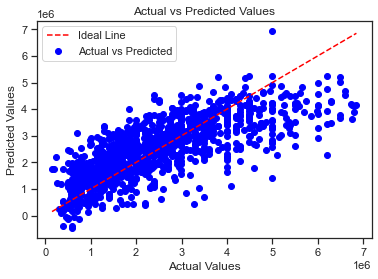

In [779]:
# Plot y_test vs y_pred
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [780]:
r2_linear = r2_score(y_test, y_test_pred)
r2_linear

0.5696414895519766

In [801]:
coefficients = pipe_lr.get_params(deep=True)
print("Coefficients:", coefficients)


Coefficients: {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=False)), ('standardscaler', StandardScaler()), ('linearregression', LinearRegression())], 'verbose': False, 'polynomialfeatures': PolynomialFeatures(degree=1, include_bias=False), 'standardscaler': StandardScaler(), 'linearregression': LinearRegression(), 'polynomialfeatures__degree': 1, 'polynomialfeatures__include_bias': False, 'polynomialfeatures__interaction_only': False, 'polynomialfeatures__order': 'C', 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': None, 'linearregression__normalize': False, 'linearregression__positive': False}


In [802]:
coefficients = pipe_lr.named_steps['linearregression'].coef_
print("Coefficients:", coefficients)
scaling_factors = pipe_lr.named_steps['standardscaler'].scale_
rescaled_coefficients = coefficients / scaling_factors

Coefficients: [ 6.23498377e+04  1.34518899e+05  2.39876548e+05  1.10276297e+05
  4.06479826e+05 -3.91859019e+04 -4.74533232e+05 -1.04639172e+05
 -1.18932120e+05 -3.52691462e+05 -4.61084707e+05 -4.10178967e+05
 -2.79015849e+05 -2.52380858e+05  1.04839140e+05 -5.37083783e+04
 -1.17638094e+04 -3.85445347e+04  2.80806173e+05  5.82588349e+05
  2.26035329e+05 -3.81101972e+09 -3.06863220e+17 -2.95052692e+17
 -3.99597090e+17 -1.09281154e+16 -7.26091106e+15 -8.58200462e+15
 -2.46313752e+15]


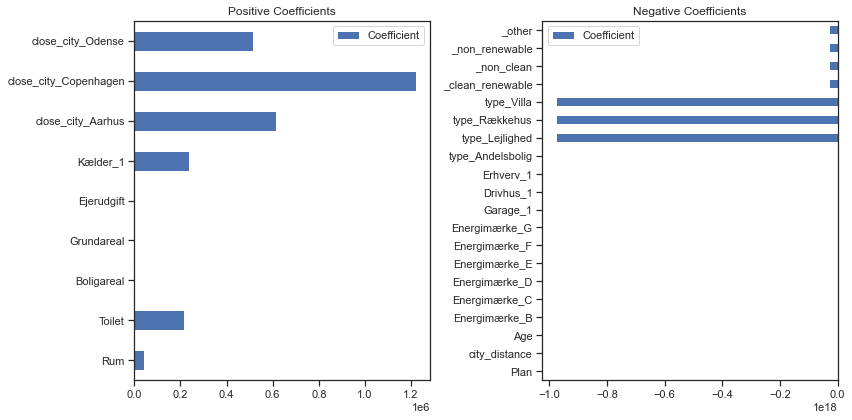

In [803]:
# Create a DataFrame with rescaled coefficients and feature names
coef_df = pd.DataFrame(rescaled_coefficients, X.columns, columns=['Coefficient'])

# Split coefficients into positive and negative parts
positive_coef = coef_df[coef_df['Coefficient'] > 0]
negative_coef = coef_df[coef_df['Coefficient'] < 0]

# Create subplots with positive and negative coefficients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
positive_coef.plot(kind='barh', ax=ax1)
negative_coef.plot(kind='barh', ax=ax2)

ax1.set_title('Positive Coefficients')
ax2.set_title('Negative Coefficients')

plt.tight_layout()
plt.show()

## Lasso

In [757]:
perform = [] # Store performance
lambdas = np.logspace(-8, 8, 20) # Grid of lambdas

# FOR EACH LAMBDA, FIT A MODEL ON TRAINING DATA, CHECK PERFORMANCE ON VALIDATION AND STORE MSE
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=161193))
    pipe_lasso.fit(X_dev, y_dev)
    y_pred = pipe_lasso.predict(X_test)
    perform.append(mse(y_pred, y_test))

# CRATE A SERIES WITH PERFORMANCE AND FIND PARM WITH LOWEST MSE    
hyperparam_perform = pd.Series(perform,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    
print('Optimal lambda:', optimal.index[0])
print('Validation MSE: %.3f' % optimal.values[0])

Optimal lambda: 6158.482110660255
Validation MSE: 829915498172.589


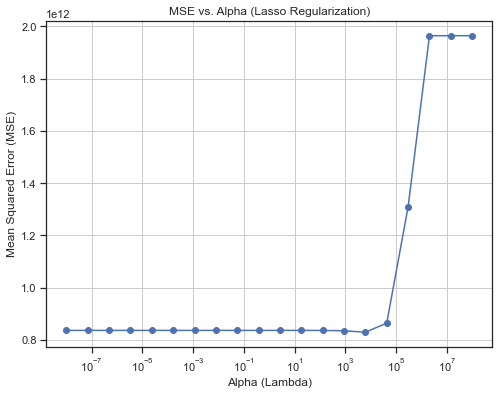

In [758]:
# Create a line plot of MSE values
plt.figure(figsize=(8, 6))
plt.plot(lambdas, perform, marker='o')
plt.xscale('log')  # Use a logarithmic scale for x-axis (optional)
plt.title('MSE vs. Alpha (Lasso Regularization)')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [759]:
lasso_model = Lasso(alpha=6158.482110660255)  # Adjust the alpha parameter as needed
lasso_model.fit(X_dev, y_dev)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
#mse = mse(y_test, y_pred)

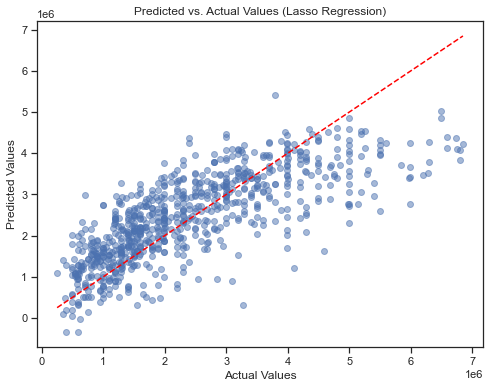

In [760]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Ridge

In [761]:
from sklearn.linear_model import Ridge


performance = [] # Store performance
lambdas = np.logspace(-8, 8, 20) # Grid of lambdas

# FOR EACH LAMBDA, FIT A MODEL ON TRAINING DATA, CHECK PERFORMANCE ON VALIDATION AND STORE MSE
for lambda_ in lambdas:
    pipe_ridge = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), 
                           StandardScaler(),
                           Ridge(alpha=6400, random_state=161193))
    pipe_ridge.fit(X_dev,y_dev)
    y_pred = pipe_ridge.predict(X_test)
    performance.append(mse(y_pred, y_test))

# CRATE A SERIES WITH PERFORMANCE AND FIND PARM WITH LOWEST MSE    
hyperparam_perform = pd.Series(performance,index=lambdas)
optimal = hyperparam_perform.nsmallest(1)    
print('Optimal lambda:', optimal.index[0])
print('Validation MSE: %.3f' % optimal.values[0])

Optimal lambda: 1e-08
Validation MSE: 1198879907694.813


In [762]:
pipe_ridge = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), 
                           StandardScaler(),
                           Ridge(alpha=6400, random_state=161193))
pipe_ridge.fit(X_dev,y_dev)
y_pred = pipe_ridge.predict(X_test)
# Calculate Mean Squared Error
print(mse(y_test, y_pred))

1198879907694.8127


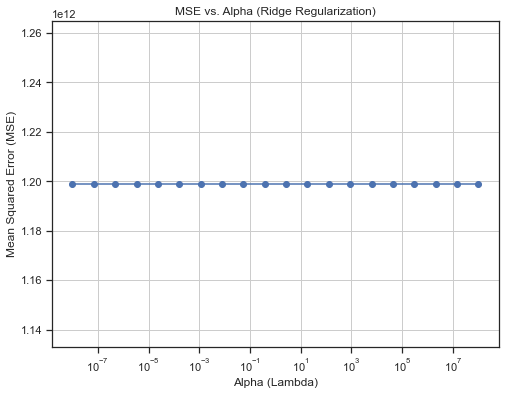

In [763]:
# Create a line plot of MSE values
plt.figure(figsize=(8, 6))
plt.plot(lambdas, performance, marker='o')
plt.xscale('log')  # Use a logarithmic scale for x-axis (optional)
plt.title('MSE vs. Alpha (Ridge Regularization)')
plt.xlabel('Alpha (Lambda)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

## Model Validation

Select optimal hypterparameters

In [774]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

lambdas = np.logspace(-4, 4, 10) # Grid of lambdas

pipe_el = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), 
                        StandardScaler(),
                        ElasticNet())

gs = GridSearchCV(estimator=pipe_el, 
                  param_grid={'elasticnet__alpha':lambdas,
                              'elasticnet__l1_ratio':np.linspace(0,1,10)}, 
                  scoring='neg_mean_squared_error', 
                  cv=10)

#gs.fit(X_dev, y_dev)
#print(mse(gs.predict(X_test),y_test))

## Compare Models

### Compare R squared 

### Learning curves

In [764]:
# LOAD FROM SCIKIT-LEARN
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=pipe_lr,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.arange(0.05, 1.05, .05),
                   scoring='neg_mean_squared_error',                 
                   cv=10)
    
mse_ = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                     'Test':-test_scores.mean(axis=1)})\
        .set_index(pd.Index(train_sizes,name='sample size'))

mse_.head(10)

,Train,Test
sample size,,
66,5.153717e+11,1.185710e+12
132,6.275147e+11,1.061798e+12
198,6.676269e+11,9.499761e+11
264,7.509423e+11,9.552356e+11
330,7.660382e+11,9.271289e+11
396,7.943431e+11,8.843553e+11
463,8.062229e+11,8.816009e+11
529,8.247814e+11,8.652929e+11
595,8.317134e+11,8.549548e+11


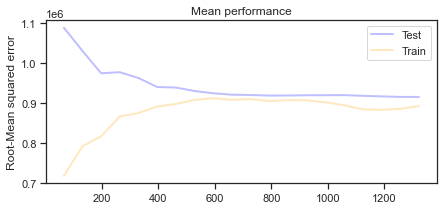

In [765]:
f_learn, ax = plt.subplots(figsize=(7,3))
ax.plot(train_sizes,np.sqrt(-test_scores.mean(1)), alpha=0.25, linewidth=2, label ='Test', color='blue') # negated, because we already use neg_MSE
ax.plot(train_sizes,np.sqrt(-train_scores.mean(1)), alpha=0.25, linewidth=2, label='Train', color='orange') # negated, because we already use neg_MSE

ax.set_title('Mean performance')
ax.set_ylabel('Root-Mean squared error')
ax.legend();

# Normal OLS for comparison

In [751]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Add a constant term to X
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Kontantpris   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     198.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:20:53   Log-Likelihood:                -59420.
No. Observations:                3920   AIC:                         1.189e+05
Df Residuals:                    3893   BIC:                         1.191e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.727e+

C:\Users\marko\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
